In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score,precision_score,recall_score,classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold,cross_val_score,train_test_split,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [27]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [28]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [30]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [31]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
print('categorical_features:',categorical_features)

categorical_features: ['ShelveLoc', 'Urban', 'US']


In [32]:
numeric_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print('numeric_features:',numeric_features)

numeric_features: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


<Axes: xlabel='Sales', ylabel='Count'>

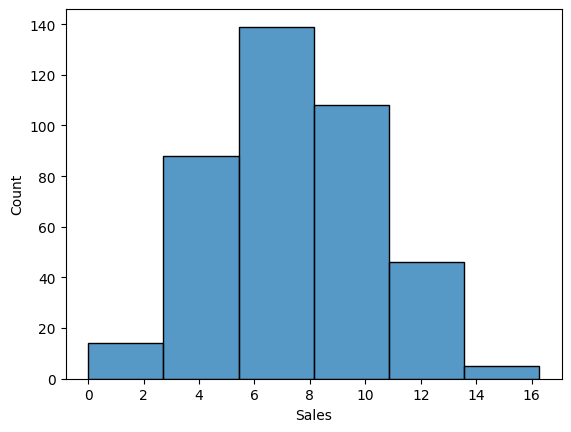

In [33]:
sns.histplot(data.Sales,bins=6)

In [34]:
data.Sales.max()/3

5.423333333333333

In [35]:
data1=data.copy()

In [36]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [37]:
data1['sub_category']=pd.cut(x=data1.Sales,bins=[0,5.5,11,17],labels=['Low','Medium','High'],right=False)
data1.drop(['Sales'],axis=1,inplace=True)

In [38]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sub_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [40]:
data1.sub_category.value_counts()

Medium    248
Low       103
High       49
Name: sub_category, dtype: int64

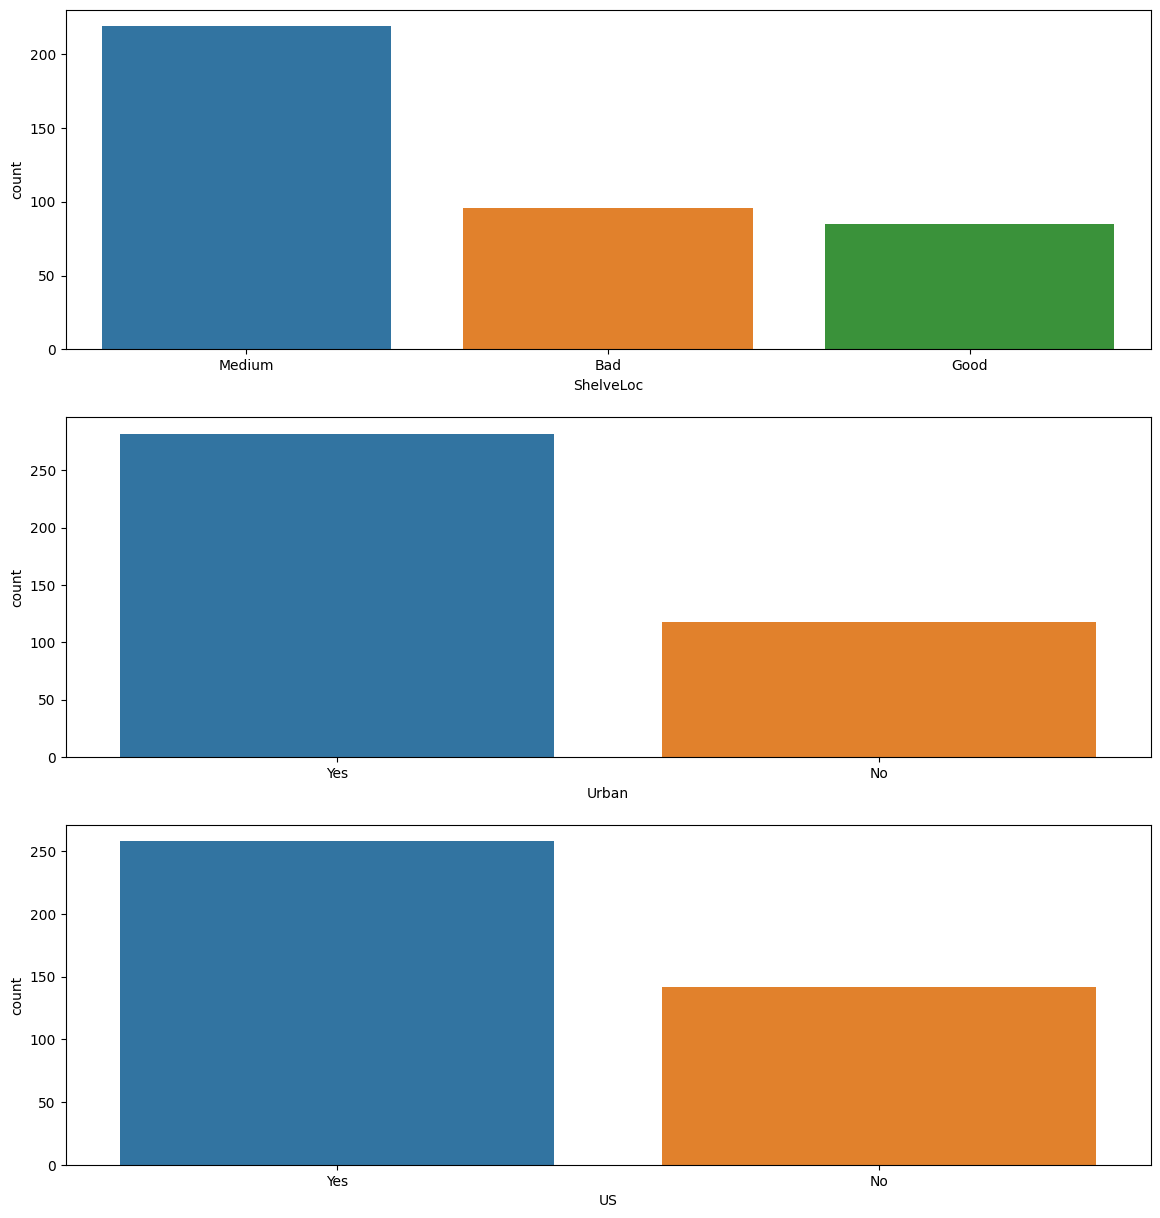

In [41]:
fig,axes=plt.subplots(len(categorical_features),1,figsize=(14,15))

for i in range(0,len(categorical_features)):
  sns.countplot(x=categorical_features[i],data=data,ax=axes[i],order=data[categorical_features[i]].value_counts().index)

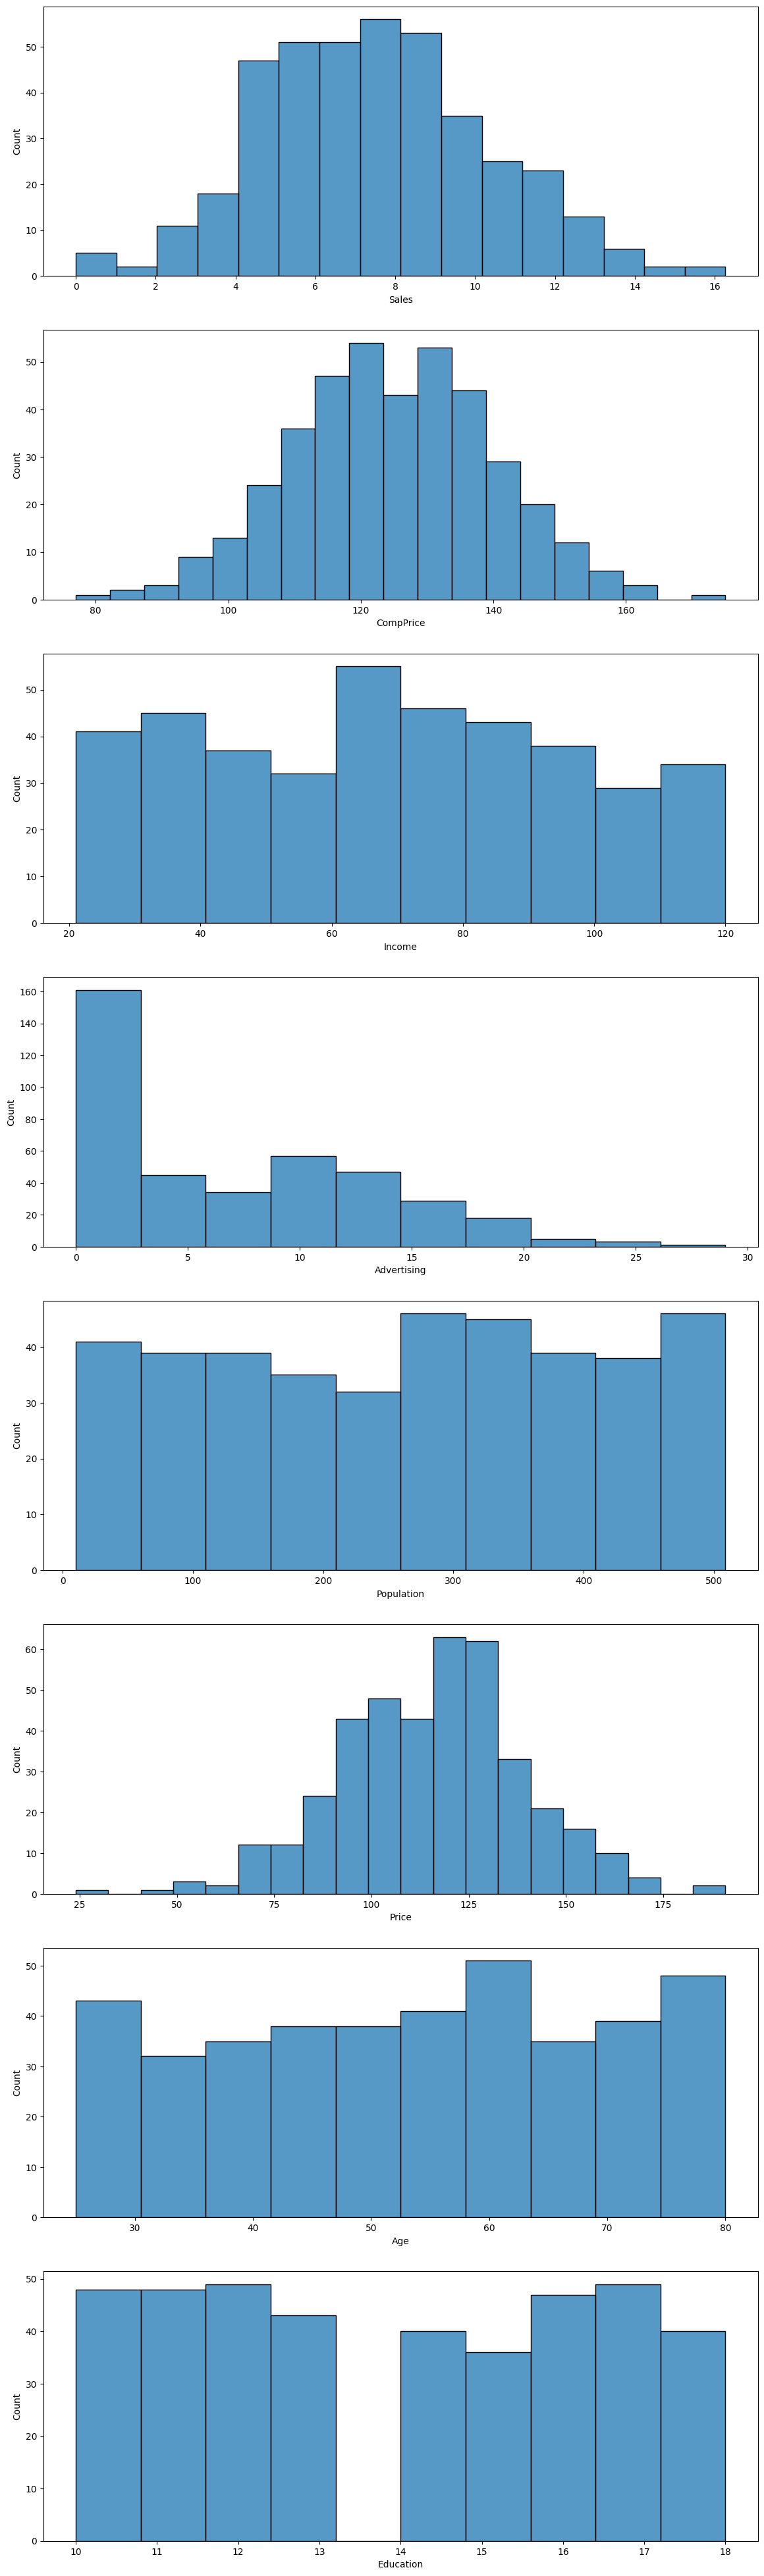

In [ ]:
fig,axes=plt.subplots(len(numeric_features),1,figsize=(14,50))

for i in range(0,len(numeric_features)):
  sns.histplot(x=data[numeric_features[i]],ax=axes[i])

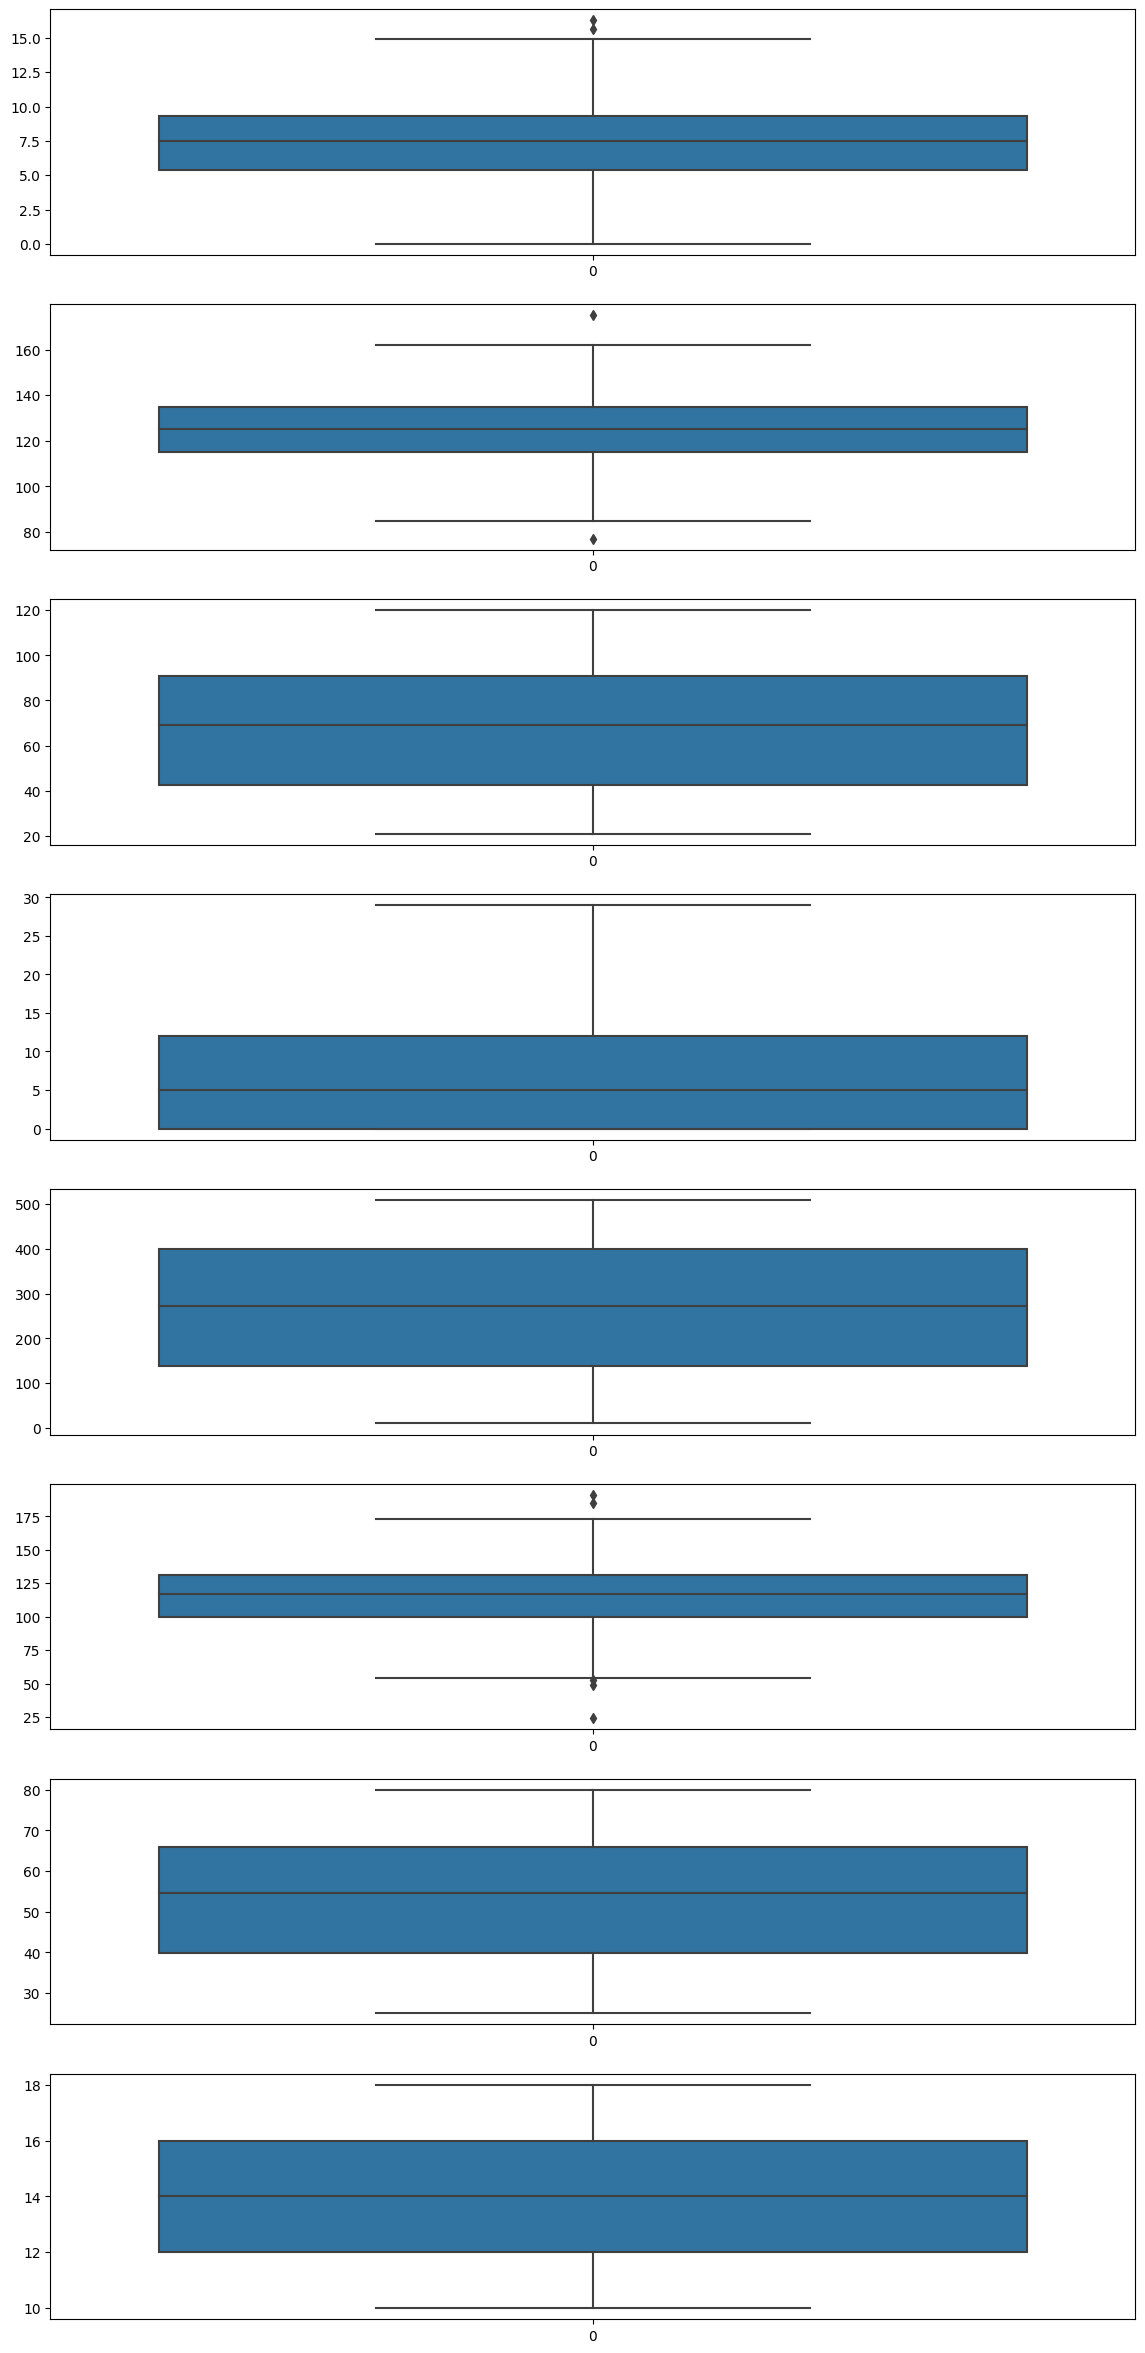

In [ ]:
fig,axes=plt.subplots(len(numeric_features),1,figsize=(14,30))
for i in range(0,len(numeric_features)):
  sns.boxplot(data[numeric_features[i]],ax=axes[i])

In [46]:
data2=data1.copy()
for feature in numeric_features:
  Q1,Q3=np.percentile(data[feature],[25,75])
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=data[feature][(data[feature] < lower_bound) | (data[feature] >upper_bound)]

  data2=data2.drop(outliers.index[:],errors='ignore')

In [47]:
data1.shape

(400, 11)

In [48]:
data2.shape

(392, 11)

In [49]:
y=data2['sub_category']
x=data2.drop(['sub_category'],axis=1)

In [50]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [51]:
y.head()

0    Medium
1      High
2    Medium
3    Medium
4       Low
Name: sub_category, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [52]:
x=pd.get_dummies(x)

In [53]:
le=LabelEncoder()
y=le.fit_transform(y)

In [55]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest,chi2

In [56]:
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(x,y)

scores=fit.scores_
features=fit.transform(x)

score_df=pd.DataFrame(list(zip(scores,x.columns)),columns=['Score','Feature'])
score_df.sort_values(by='Score',ascending=False,inplace=True)
score_df

,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


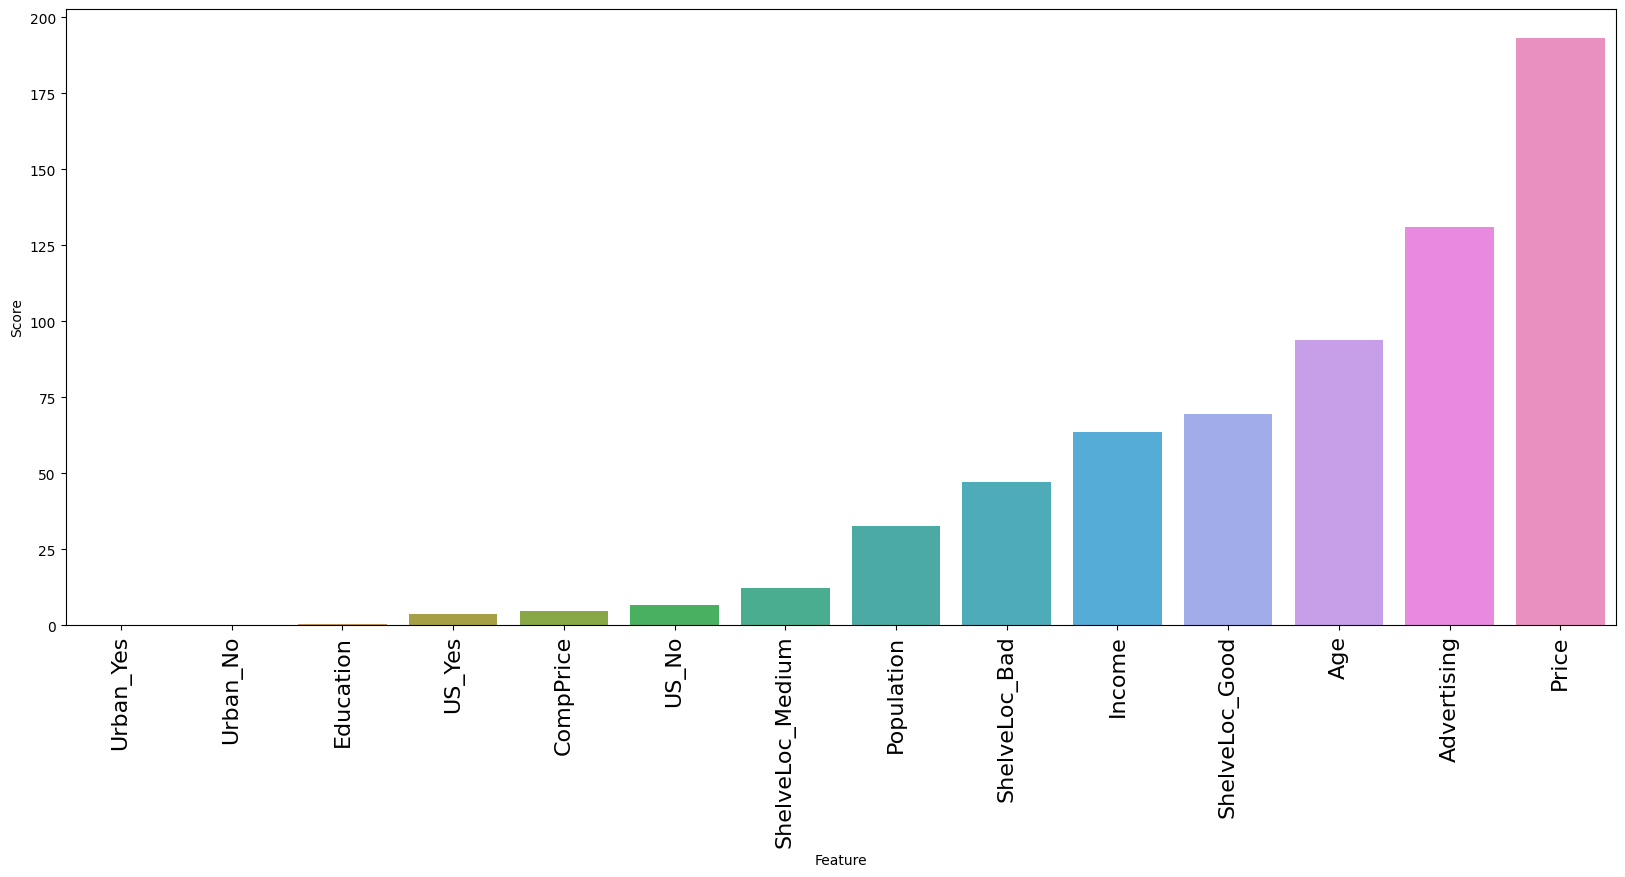

In [57]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature) 
plt.xticks(rotation = 90, fontsize = 16)
plt.show() 

In [58]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]
model_data_x.head()

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141


In [59]:
model_data_y = y 
model_data_y[:5] 

array([2, 0, 2, 2, 1])

In [61]:
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

In [62]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)  

Shape of X_train:  (313, 10)
Shape of X_test:  (79, 10)
Shape of y_train:  (313,)
Shape of y_test (79,)


**Building Random Forest Classifier**

In [63]:
num_trees = 100
max_features = 3

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, model_data_x, model_data_y, cv=kfold)

print('Batchwise accuracy is:', '\n', results, '\n')
print('Overall accuracy is:', results.mean())

Batchwise accuracy is: 
 [0.725      0.675      0.71794872 0.71794872 0.74358974 0.61538462
 0.69230769 0.76923077 0.79487179 0.74358974] 

Overall accuracy is: 0.7194871794871794


**Grid search for hyper parameter tuning**

In [64]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier(random_state=7)

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(model_data_x, model_data_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [65]:
print(grid.best_score_)
print(grid.best_params_) 

0.7248076923076923
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 125}


**Building final model on grid.best_params_ parameters**



In [66]:
model_kf =grid.best_estimator_
model_kf.fit(model_data_x, model_data_y)

results = cross_val_score(model_kf, model_data_x, model_data_y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))  

Accuracy with k fold validation 0.725


In [67]:
model = grid.best_estimator_ 
model.fit(x_train, y_train)

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred)) 

Accuracy with train test split: 0.6582278481012658


In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.50      0.26      0.34        19
           2       0.69      0.87      0.77        52

    accuracy                           0.66        79
   macro avg       0.56      0.46      0.48        79
weighted avg       0.63      0.66      0.62        79



<Axes: >

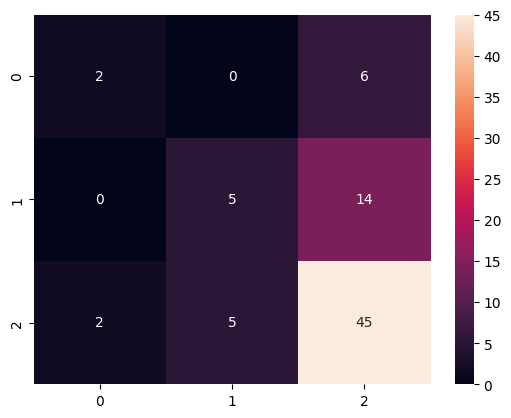

In [70]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)